# Seaborn

* 기존 matplotlib에 기본 설정을 추가
* 복잡한 그래프를 간단하게 만들 수 있는 wrapper
* 간단한 코드 + 예쁜 결과

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

* [seaborn.set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)

In [7]:
sns.set(style = 'darkgrid')

* seaborn에서 제공하는 dataset

In [8]:
tips = sns.load_dataset('tips')
fmri = sns.load_dataset('fmri')

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


## Basic plot

* 데이터값들이 정렬되지 않아도 알아서 그래프를 그려줌
* line과 함께 데이터의 분포도 함께 보여줌

* lineplot

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

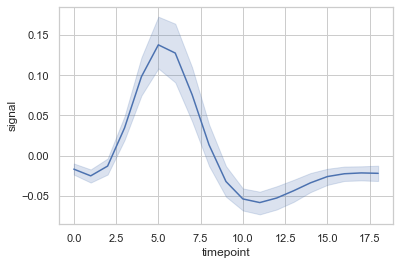

In [14]:
sns.set_style('whitegrid')
sns.lineplot(x = 'timepoint', y = 'signal', data = fmri)

* hue

In [18]:
# categroical data
fmri['event'].unique()

array(['stim', 'cue'], dtype=object)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

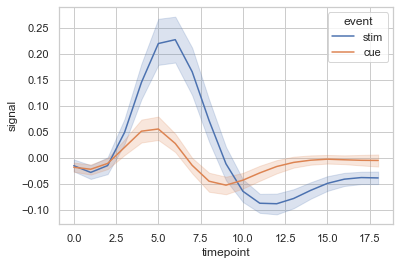

In [20]:
# 두 가지 event를 기준으로 x와 y가 어떻게 달라지는지 그래프를 두 개로 보여줌
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', data=fmri)

* Scatterplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

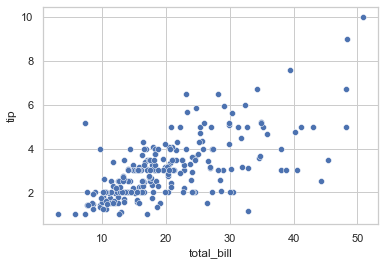

In [30]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

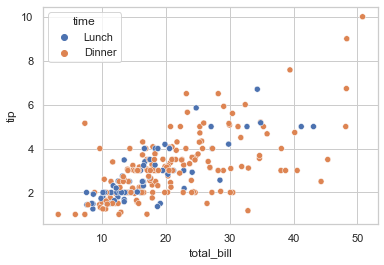

In [31]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'time', data = tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

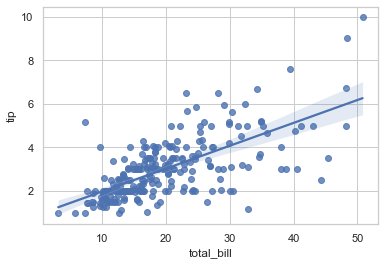

In [29]:
# scatterplot과 비슷한 regression plot
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

* Countplot
  * categorical data를 위한 plot
  * data의 갯수를 세어주는 plot

In [35]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

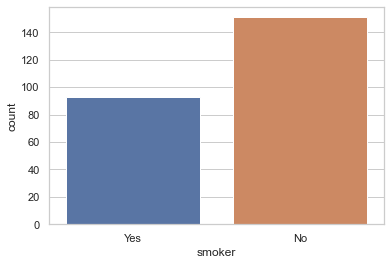

In [38]:
# 흡연자의 수
sns.countplot(x = 'smoker', data = tips)

<AxesSubplot:xlabel='smoker', ylabel='count'>

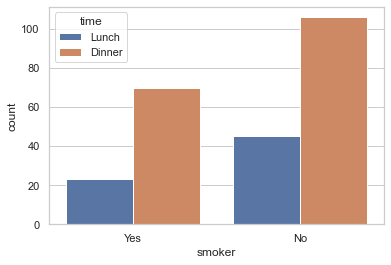

In [40]:
# 시간별 흡연자의 수
sns.countplot(x = 'smoker', hue = 'time', data = tips)

* Barplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

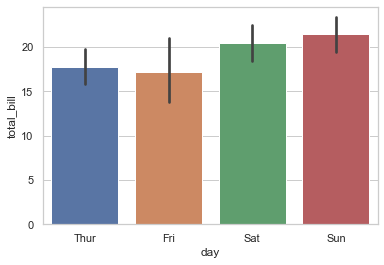

In [41]:
sns.barplot(x = 'day', y = 'total_bill', data = tips)

In [46]:
# 위의 barplot은 평균을 나타낸 것, 검은 줄은 분포를 나타낸 것임.
tips.groupby(['day'])['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

* `estimator = len` : 데이터의 갯수를 보고 싶을 때
* `estimator = std` : 데이터의 표준편차를 보고 싶을 때

<AxesSubplot:xlabel='day', ylabel='total_bill'>

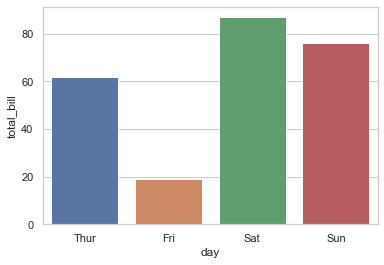

In [48]:
sns.barplot(x = 'day', y = 'total_bill', data = tips, estimator = len)

## Distributuion plot (distplot)

* 데이터의 분포를 보여주는 plot

<AxesSubplot:xlabel='total_bill'>

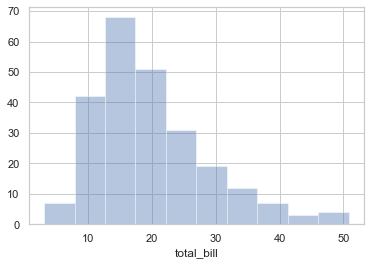

In [52]:
# bins : 막대의 갯수, kde : 추세선의 유무
sns.distplot(tips['total_bill'], bins = 10, kde = False)

## Predefined plots

* Stripplot : scatter와 category 정보를 함께 표현
* Pointplot : category별로 numeric data의 평균, 신뢰구간 표시
* Regplot : scatter를 선형함수와 함께 표시

* Violinplot : boxplot에 distribution을 함께 표현

<AxesSubplot:xlabel='day', ylabel='total_bill'>

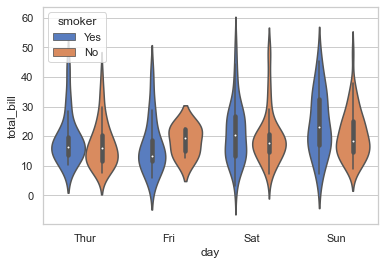

In [54]:
sns.violinplot(x = 'day',
               y = 'total_bill',
               hue = 'smoker',
               data = tips,
               palette = 'muted')

* Swarmplot : 분포와 함께 scatter를 함께 표현

<AxesSubplot:xlabel='day', ylabel='total_bill'>

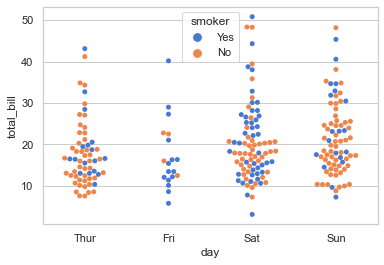

In [55]:
sns.swarmplot(x = 'day',
               y = 'total_bill',
               hue = 'smoker',
               data = tips,
               palette = 'muted')

* catplot()

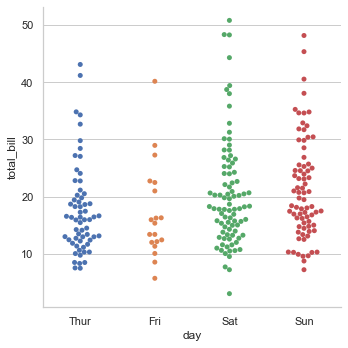

In [57]:
# category plot에 kind = 'swarm'을 넣어주면 swarmplot과 같음
sns.catplot(x = 'day', y = 'total_bill', kind = 'swarm', data = tips)

* FacetGrid() : grid를 생성하고 grid에 다른 그래프를 mapping할 수 있음

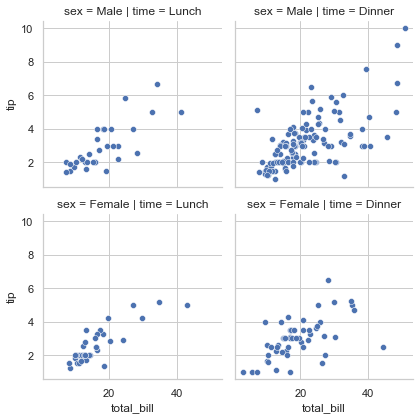

In [64]:
g = sns.FacetGrid(tips, col = 'time', row = 'sex')
g.map(sns.scatterplot, 'total_bill','tip')